In [2]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

In [23]:
import tweepy

auth = tweepy.OAuthHandler(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'])
auth.set_access_token(CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)


See? Kim gets it https://t.co/b53XhqylXr
RT @mayawiley: On of the explosive reveals is that #RepGosar dangled “pardons” in the discussion with #Jan6 witnesses who helped org &amp; plan…
@dongwon Do you plan on trying out a few builds or do you have something in mind already?
Grading papers til I fall asleep.
Probably just a few hours left to snag one!
Alright, family. It’s about tiimmmeeeee #InsecureHBO  #SeasonByeve
I've never been touched by scandal. My name is above reproach. Therefore, I'm sorry, but one of you is going to have to leave!"
I opened the door to my hotel room and found a pair of beautiful young naked twins stretched out on my bed. "Surpri… https://t.co/mR1ndIFJFj
If H2O is the formula for water, what's the formula for ice? H2O cubed.
@dongwon I'm really digging DS3, though I skipped #2 and have given up on trying to tie all the lore together (yet).
George #GetYerBakeOn https://t.co/ETEWB4wfIm
Had a good day. https://t.co/BRdQpSb21f
@precatlady Thank you for properly c

In [24]:
import pandas as pd

search_words = "#squidgame"
date_since = "2021-10-01"
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words, lang="en").items(300)

tweets_sorted = [[tweet.user.screen_name, tweet.geo, tweet.user.location, tweet.text] for tweet in tweets]


In [25]:
tdf = pd.DataFrame(data=tweets_sorted, columns=['user', 'coordinates','location', 'tweet'])
print(tdf)

                user coordinates                       location  \
0          scottlunn        None  Holly Springs, North Carolina   
1        itsSandanuK        None                         Global   
2         SonyandSam        None                                  
3        PaulsonThor        None                Orland Park, IL   
4        Sonic_Robin        None                  Subcon Forest   
..               ...         ...                            ...   
295      BotheredBoy        None          Nowhere in particular   
296         bvtmansc        None                     she/her 17   
297    ihonestlydkrn        None                    your closet   
298        DaveBoyce        None   Halifax, Nova Scotia, Canada   
299  jimmygunawanapp        None                         Sydney   

                                                 tweet  
0    So I gave in and watched #SquidGame and just f...  
1          Let's see... #SquidGame is a huge success 🤔  
2    RT @umikochannart: 

In [26]:
locs = tdf['location'].value_counts()
print(locs)

                    114
Subcon Forest        21
United States         5
USA                   4
Florida, USA          3
                   ... 
Canada                1
Mississippi, USA      1
yo mama’s house       1
Simpsonwave           1
Queendom              1
Name: location, Length: 148, dtype: int64


In [31]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def find_location(row):
    place = row['location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf


RateLimiter caught an error, retrying (0/2 tries). Called with (*('23, she/they',), **{}).
Traceback (most recent call last):
  File "C:\Users\an111789\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\an111789\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\an111789\Anaconda3\lib\http\client.py", line 1347, in getresponse
    response.begin()
  File "C:\Users\an111789\Anaconda3\lib\http\client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "C:\Users\an111789\Anaconda3\lib\http\client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\an111789\Anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\an111789\Anaconda3\lib\ssl.py", line 1241, in

,user,coordinates,location,tweet,latitude,longitude
0,scottlunn,None,"Holly Springs, North Carolina",So I gave in and watched #SquidGame and just f...,35.651266,-78.833622
1,itsSandanuK,None,Global,Let's see... #SquidGame is a huge success 🤔,43.728387,-79.349149
2,SonyandSam,None,,RT @umikochannart: Doodles 🏃‍♀️ #SquidGame htt...,Not Found,Not Found
3,PaulsonThor,None,"Orland Park, IL",RT @DWPoop: The Ninth Doctor wins Squid Game #...,41.630663,-87.853629
4,Sonic_Robin,None,Subcon Forest,RT @raspyalt: sae-byeok 😳😳\n(rts are appreciat...,1.517744,103.743757
...,...,...,...,...,...,...
295,BotheredBoy,None,Nowhere in particular,The media doesn't talk about the general strik...,39.674737,-84.115727
296,bvtmansc,None,she/her 17,RT @dotssu: the gi hun gamez #squidgame https:...,35.117241,-89.913269
297,ihonestlydkrn,None,your closet,"RT @alinajames: Marley vs Paradis, now in moti...",34.360604,-89.589714
298,DaveBoyce,None,"Halifax, Nova Scotia, Canada",Finally watching #SquidGame https://t.co/AcQ07...,44.648618,-63.585949


In [32]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

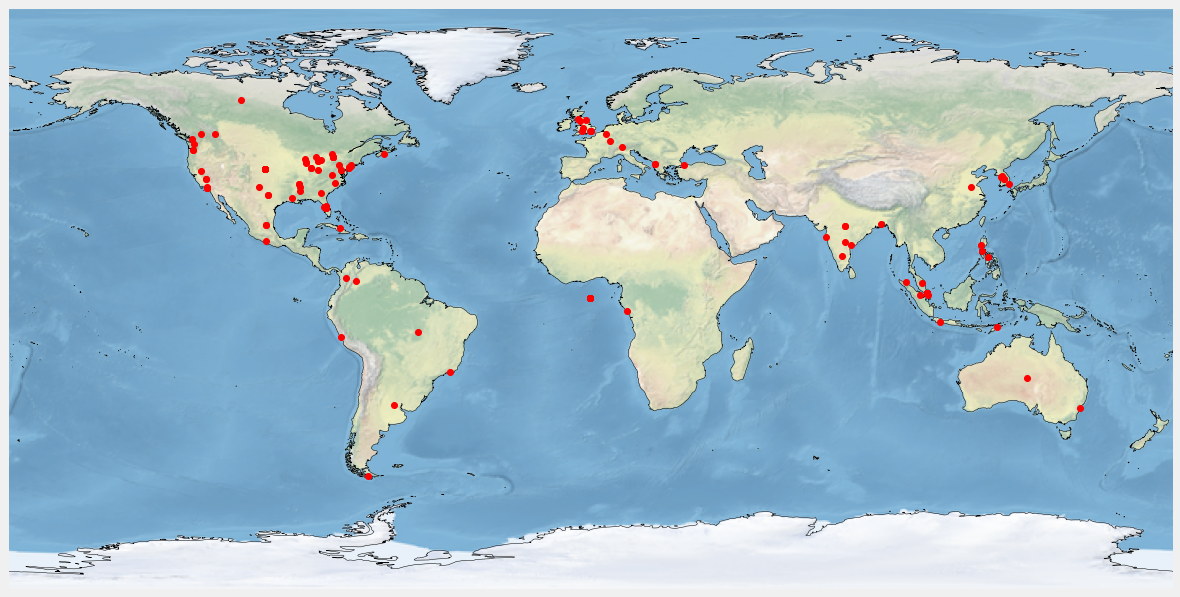

In [36]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

lats = tdf['latitude'].dropna()
longs = tdf['longitude'].dropna()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                              
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()
